In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sn
from sklearn.model_selection import train_test_split

Loading the Dataset

In [4]:
data=pd.read_csv("data.csv")

In [5]:
data

,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,Class Status
0,0.00348,0.000024,0.00178,0.00191,0.00533,0.03977,0.366,0.02164,0.02182,0.03484,0.06493,0.010534,21.963,0.46413,0.57414,0.16807,1
1,0.00097,0.000004,0.00009,0.00025,0.00028,0.15674,1.409,0.07499,0.11461,0.14489,0.22496,0.079020,11.965,0.59795,0.62956,0.75490,0
2,0.00302,0.000013,0.00153,0.00141,0.00459,0.02070,0.202,0.01098,0.01226,0.01493,0.03294,0.020105,29.753,0.26885,0.63601,0.15521,1
3,0.00774,0.000022,0.00194,0.00263,0.00581,0.21267,1.862,0.09314,0.09946,0.07348,0.27941,0.511002,3.415,0.59176,0.65600,0.78174,0
4,0.00636,0.000034,0.00316,0.00332,0.00949,0.03586,0.363,0.01515,0.01751,0.03408,0.04545,0.041365,17.798,0.65999,0.64159,0.32376,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.00814,0.000052,0.00334,0.00404,0.01003,0.03820,0.377,0.01841,0.02190,0.03578,0.05522,0.028033,17.069,0.62887,0.75147,0.33377,1
236,0.00571,0.000032,0.00309,0.00279,0.00928,0.01757,0.154,0.00964,0.00963,0.01262,0.02891,0.018780,23.226,0.51443,0.66074,0.19073,1
237,0.00294,0.000018,0.00050,0.00127,0.00149,0.05587,0.498,0.02922,0.03577,0.05396,0.08765,0.025277,17.277,0.65426,0.69168,0.82140,0
238,0.07183,0.000364,0.04356,0.04744,0.13068,0.16993,1.548,0.08442,0.11389,0.09560,0.25326,0.725370,2.206,0.82670,0.63404,0.43811,1


Checking null values and others

In [6]:
data.isnull().sum()

Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
Class Status     0
dtype: int64

In [7]:
X = data.drop(["Class Status"],axis=1)
y = data["Class Status"]

Variation Inflation Factor

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

          feature           VIF
0       Jitter(%)  1.795117e+02
1     Jitter(Abs)  1.918632e+01
2      Jitter:RAP  2.102307e+06
3     Jitter:PPQ5  6.215363e+01
4      Jitter:DDP  2.101919e+06
5         Shimmer  9.425278e+02
6     Shimmer(dB)  6.890669e+02
7    Shimmer:APQ3  1.225216e+08
8    Shimmer:APQ5  1.651306e+02
9   Shimmer:APQ11  8.118014e+01
10    Shimmer:DDA  1.224942e+08
11            NHR  8.350390e+00
12            HNR  3.796420e+01
13           RPDE  2.676158e+01
14            DFA  7.005944e+01
15            PPE  4.321780e+00


Since VIF Is less than 5, there is no significant cross correlation between variables

# Data Visualization

**Pair Plot**

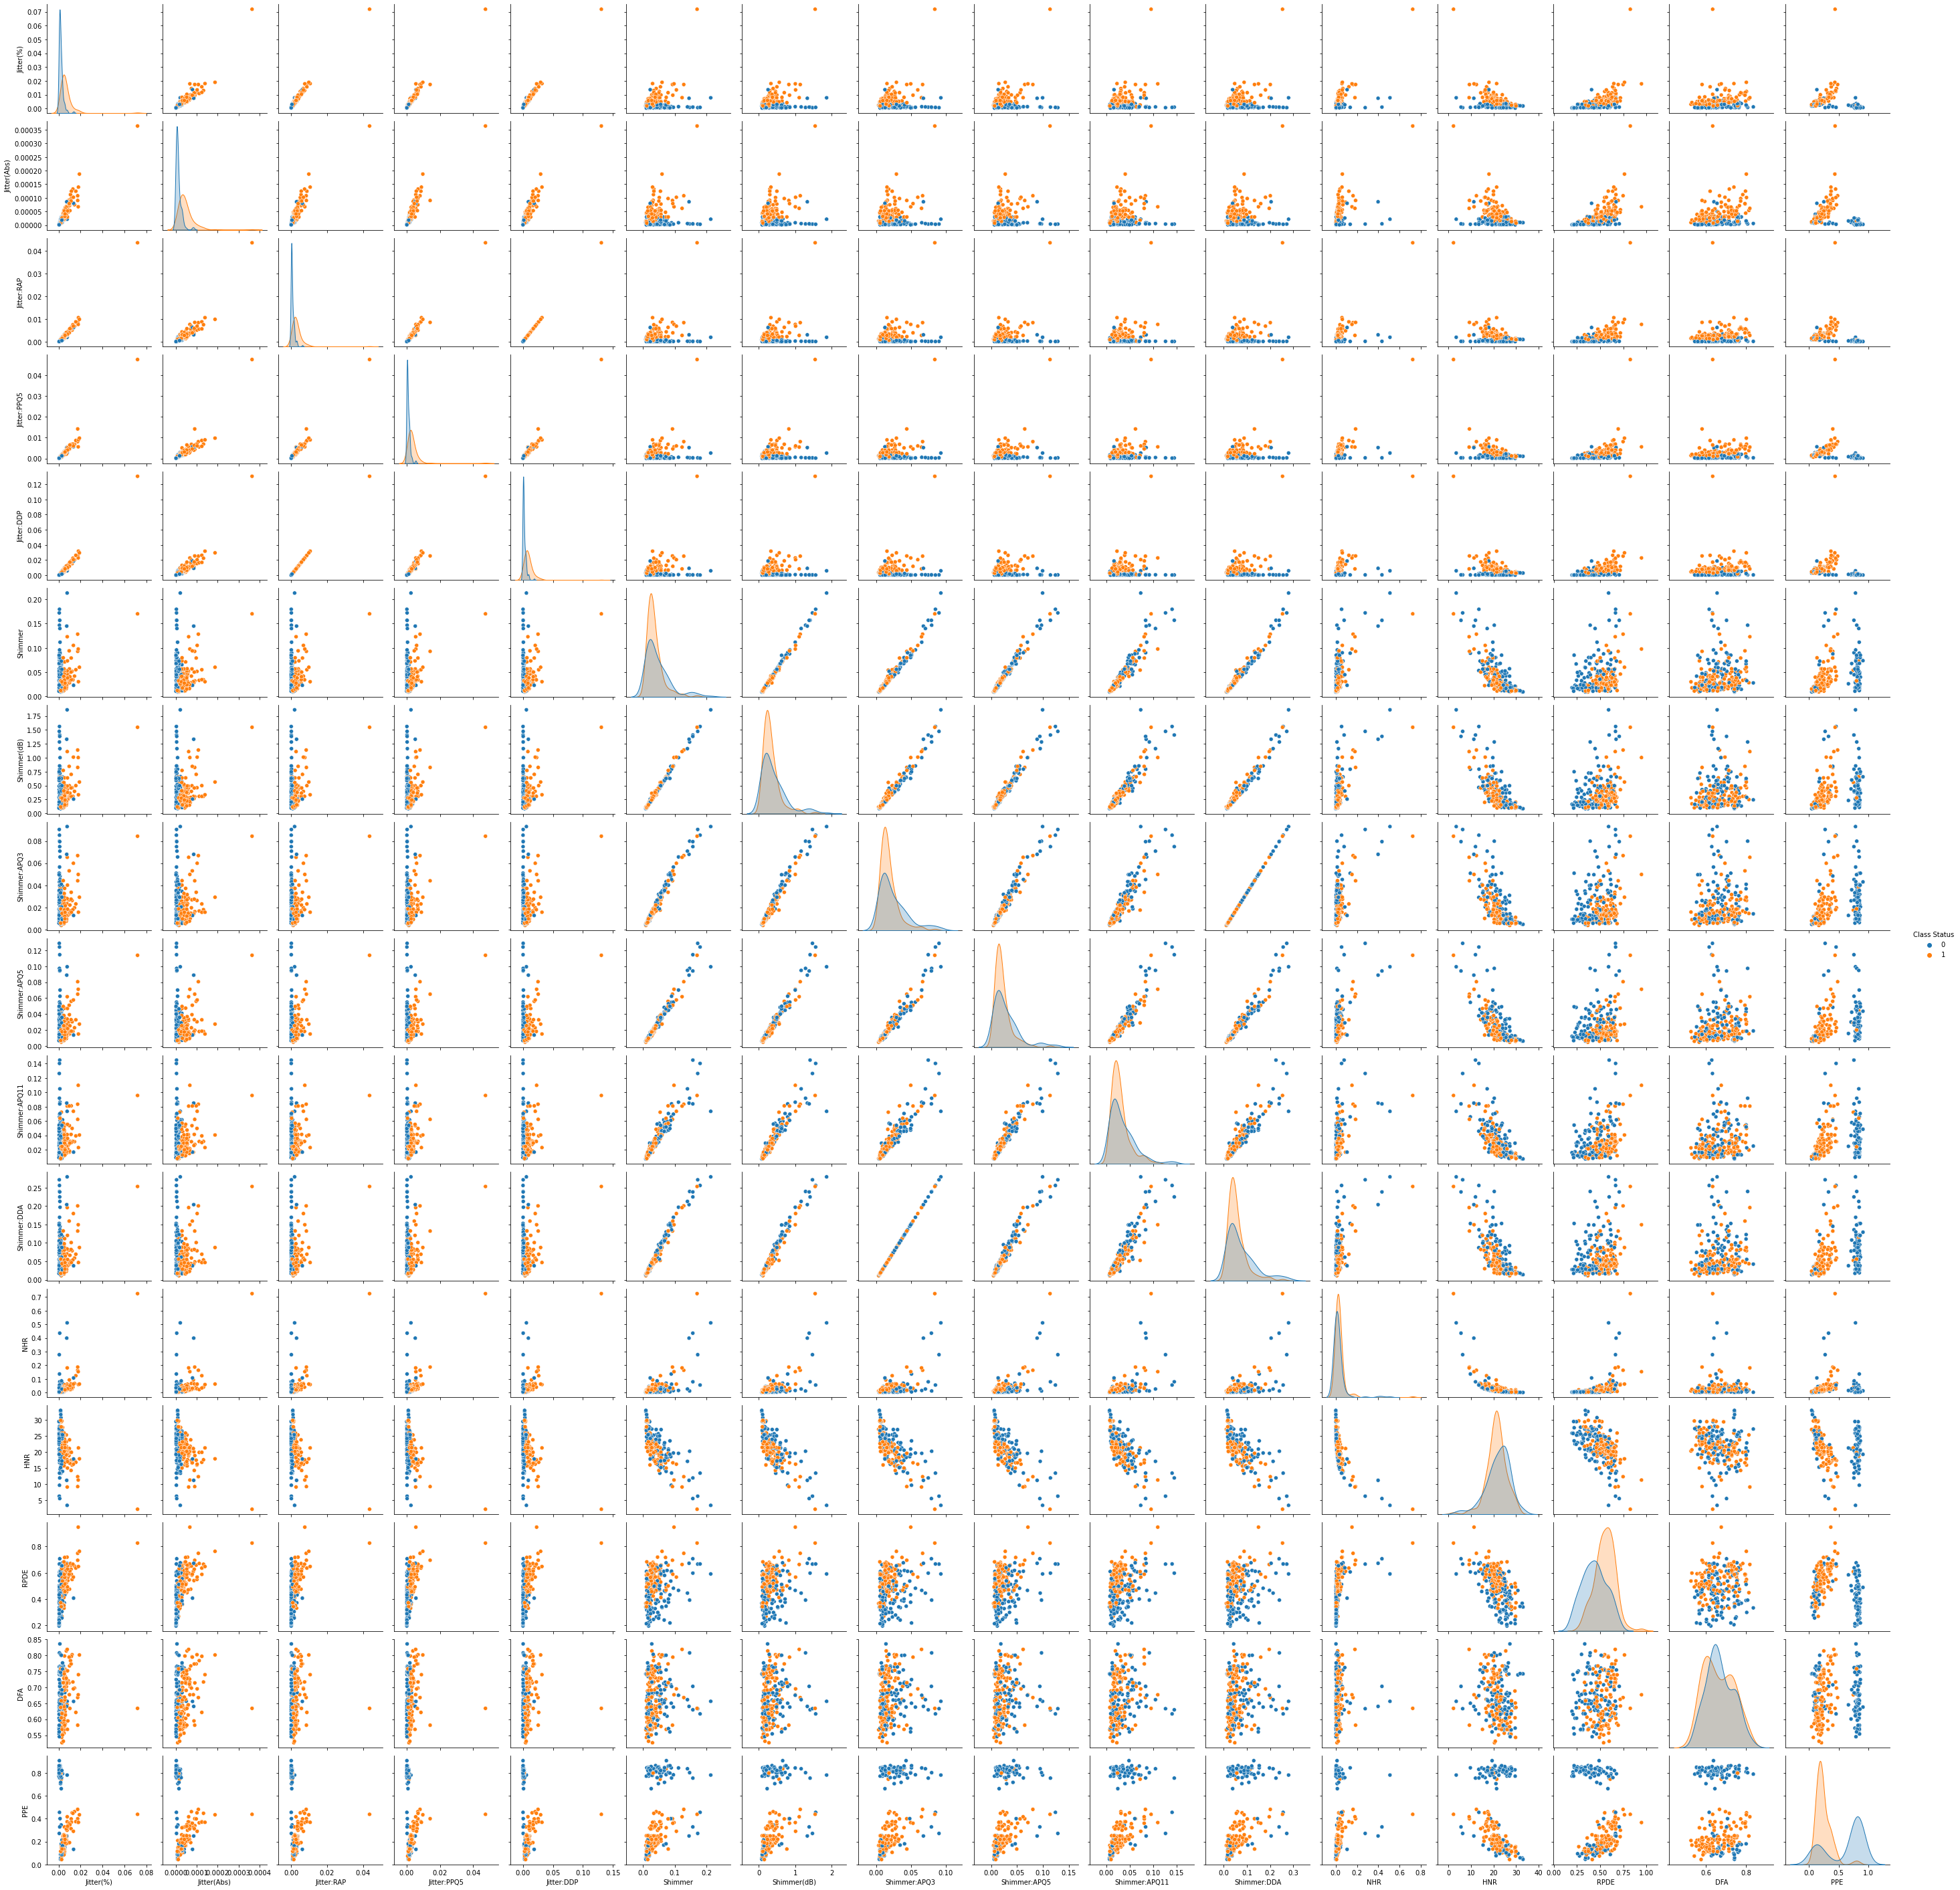

In [19]:
sn.pairplot(data,hue="Class Status")

**Heat Map**

<AxesSubplot:>

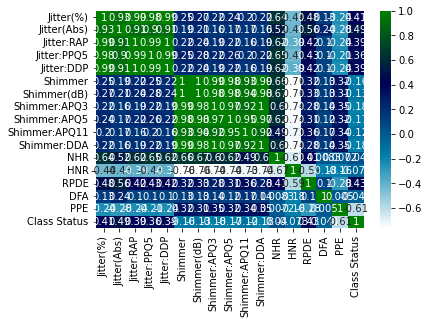

In [21]:
sn.heatmap(data.corr(),annot=True,cmap="ocean_r")

**Test Train Split**

In [9]:
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.2, 
                                   shuffle=True)

**Standard scaling**

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Instantiate encoder/scaler
scaler = StandardScaler()


# train data
# Scale and Encode Separate Columns
train_scaled_columns  = scaler.fit_transform(X_train) 
train_x=scaler.fit_transform(X_train)
test_x=scaler.fit_transform(X_test)

**Logistic Regression**

In [14]:
model = LogisticRegression(solver='lbfgs').fit(test_x,y_test)

In [15]:
confusion_matrix(y_test, model.predict(test_x))

array([[20,  4],
       [ 1, 23]], dtype=int64)

In [21]:
print(classification_report(y_test, model.predict(test_x)))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89        24
           1       0.85      0.96      0.90        24

    accuracy                           0.90        48
   macro avg       0.90      0.90      0.90        48
weighted avg       0.90      0.90      0.90        48



**Gaussian Naive bayes**

In [22]:
#the best
from sklearn.naive_bayes import GaussianNB #oversample does better
gnb = GaussianNB()
gnb.fit(train_x, y_train)
y_pred = gnb.predict(test_x)

In [23]:
confusion_matrix(y_test, y_pred)

array([[21,  3],
       [ 7, 17]], dtype=int64)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        24
           1       0.85      0.71      0.77        24

    accuracy                           0.79        48
   macro avg       0.80      0.79      0.79        48
weighted avg       0.80      0.79      0.79        48



**Support Vector Machines**

In [23]:
from sklearn.svm import SVC  
clf = SVC(C=10, gamma=0.1, kernel='poly') 
model=clf.fit(train_x, y_train)
pred=model.predict(test_x)

In [24]:
confusion_matrix(y_test, pred)

array([[21,  3],
       [ 2, 22]], dtype=int64)

In [25]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        24
           1       0.88      0.92      0.90        24

    accuracy                           0.90        48
   macro avg       0.90      0.90      0.90        48
weighted avg       0.90      0.90      0.90        48



**Hyper Parameter Tuning**

In [21]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','poly','rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(train_x, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.846 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.846 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.895 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.763 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.895 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.872 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.872 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.895 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.868 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.921 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.538 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf

[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.789 total time=   0.0s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.868 total time=   0.0s
[CV 1/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.923 total time=   0.0s
[CV 2/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.846 total time=   0.0s
[CV 3/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.842 total time=   0.0s
[CV 4/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.842 total time=   0.0s
[CV 5/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.868 total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.538 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.538 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.526 total time=   0.0s
[CV 4/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.526 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.526 total time=   0.0s
[CV 1/5] END .....C=10, gamm

[CV 1/5] END ....C=1000, gamma=1, kernel=linear;, score=0.923 total time=   0.1s
[CV 2/5] END ....C=1000, gamma=1, kernel=linear;, score=0.821 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=1, kernel=linear;, score=0.868 total time=   0.1s
[CV 4/5] END ....C=1000, gamma=1, kernel=linear;, score=0.842 total time=   0.1s
[CV 5/5] END ....C=1000, gamma=1, kernel=linear;, score=0.816 total time=   0.1s
[CV 1/5] END ......C=1000, gamma=1, kernel=poly;, score=0.949 total time=   0.0s
[CV 2/5] END ......C=1000, gamma=1, kernel=poly;, score=0.872 total time=   0.0s
[CV 3/5] END ......C=1000, gamma=1, kernel=poly;, score=0.921 total time=   0.0s
[CV 4/5] END ......C=1000, gamma=1, kernel=poly;, score=0.816 total time=   0.0s
[CV 5/5] END ......C=1000, gamma=1, kernel=poly;, score=0.868 total time=   0.0s
[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.897 total time=   0.0s
[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.769 total time=   0.0s
[CV 3/5] END .......C=1000, 

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=3)

In [22]:
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'poly'}
SVC(C=10, gamma=0.1, kernel='poly')


**Decision tree**

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100)

In [48]:
clf_gini.fit(train_x, y_train)
y_pred = clf_gini.predict(test_x)

In [49]:
confusion_matrix(y_test, y_pred)

array([[23,  1],
       [ 7, 17]], dtype=int64)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.96      0.85        24
           1       0.94      0.71      0.81        24

    accuracy                           0.83        48
   macro avg       0.86      0.83      0.83        48
weighted avg       0.86      0.83      0.83        48



#  Ensemble models

**Random Forest**

In [51]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(train_x, y_train)
y_pred = clf.predict(test_x)

In [52]:
confusion_matrix(y_test, y_pred)

array([[22,  2],
       [ 5, 19]], dtype=int64)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        24
           1       0.90      0.79      0.84        24

    accuracy                           0.85        48
   macro avg       0.86      0.85      0.85        48
weighted avg       0.86      0.85      0.85        48



**LightGBM**

In [55]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [56]:
model = LGBMClassifier() 
model.fit(train_x, y_train)
pred = model.predict(test_x)
accuracy = model.score(test_x, y_test)

In [57]:
confusion_matrix(y_test, pred)

array([[22,  2],
       [ 5, 19]], dtype=int64)

In [58]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        24
           1       0.90      0.79      0.84        24

    accuracy                           0.85        48
   macro avg       0.86      0.85      0.85        48
weighted avg       0.86      0.85      0.85        48



**Extra Trees Classifier**

In [59]:
from sklearn.ensemble import ExtraTreesClassifier #undersample does better
extra_tree_forest = ExtraTreesClassifier(
                                        criterion ='entropy')
extra_tree_forest.fit(train_x, y_train)
pred = extra_tree_forest.predict(test_x)
accuracy = extra_tree_forest.score(test_x, y_test)

In [60]:
confusion_matrix(y_test, pred)

array([[21,  3],
       [ 1, 23]], dtype=int64)

In [61]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        24
           1       0.88      0.96      0.92        24

    accuracy                           0.92        48
   macro avg       0.92      0.92      0.92        48
weighted avg       0.92      0.92      0.92        48



**XGBoost**

In [63]:
import xgboost as xgb
xg_reg = xgb.XGBClassifier()

In [64]:
xg_reg.fit(train_x, y_train)
pred = xg_reg.predict(test_x)

In [65]:
confusion_matrix(y_test, pred)

array([[23,  1],
       [ 4, 20]], dtype=int64)

In [66]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        24
           1       0.95      0.83      0.89        24

    accuracy                           0.90        48
   macro avg       0.90      0.90      0.90        48
weighted avg       0.90      0.90      0.90        48

